In [100]:
import PDolar as PE
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
# between days

today = dt(2024, 9, 12)
begin_date = dt(2024, 9, 1)

range_data = PE.load_data(begin_date, today)
last_data = PE.last_days_data(days = 3)
day_data = PE.load_day_data(today)


In [165]:
def preprocess_data(df):
    df['datetime'] = pd.to_datetime(df['day'] + ' ' + df['time'], format='%d-%m-%Y %H:%M:%S')
    df['spread'] = df['sale_cost'] - df['buy_cost']
    # df.set_index('datetime', inplace=True)
    return df

day_banks_df = preprocess_data(day_data['bank']).query('type == "bank" and buy_cost > 0')
day_exchanges_df = preprocess_data(day_data['he']).query('buy_cost > 0')

last_banks_df = preprocess_data(day_data['bank']).query('type == "bank" and buy_cost > 0')
last_exchanges_df = preprocess_data(day_data['he']).query('buy_cost > 0')



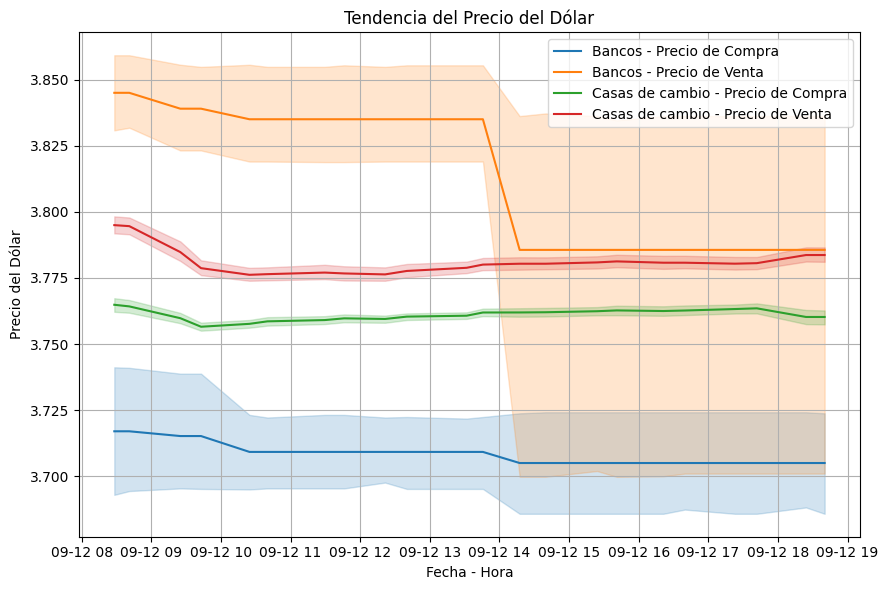

In [166]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=day_banks_df, x=day_banks_df.index, y='buy_cost', label='Bancos - Precio de Compra')
sns.lineplot(data=day_banks_df, x=day_banks_df.index, y='sale_cost', label='Bancos - Precio de Venta')
sns.lineplot(data=day_exchanges_df, x=day_exchanges_df.index, y='buy_cost', label='Casas de cambio - Precio de Compra')
sns.lineplot(data=day_exchanges_df, x=day_exchanges_df.index, y='sale_cost', label='Casas de cambio - Precio de Venta')

plt.xlabel('Fecha - Hora')
plt.ylabel('Precio del Dólar')
plt.title('Tendencia del Precio del Dólar')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./figs/1tendencia_precios_casas.png')
plt.show()


In [98]:
# # Calcular la variación diaria para bancos
# banks_df['buy_variation_abs'] = banks_df['buy_variation'].abs()
# banks_df['sale_variation_abs'] = banks_df['sale_variation'].abs()

# # Gráfico de volatilidad (variación absoluta)
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=banks_df, x=banks_df.index, y='buy_variation', label='Volatilidad Compra', color='blue')
# sns.lineplot(data=banks_df, x=banks_df.index, y='sale_variation', label='Volatilidad Venta', color='red')
# plt.title('Volatilidad del Precio del Dólar en Bancos a lo Largo del Día')
# plt.xlabel('Hora')
# plt.ylabel('Variación Absoluta')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# # plt.show()


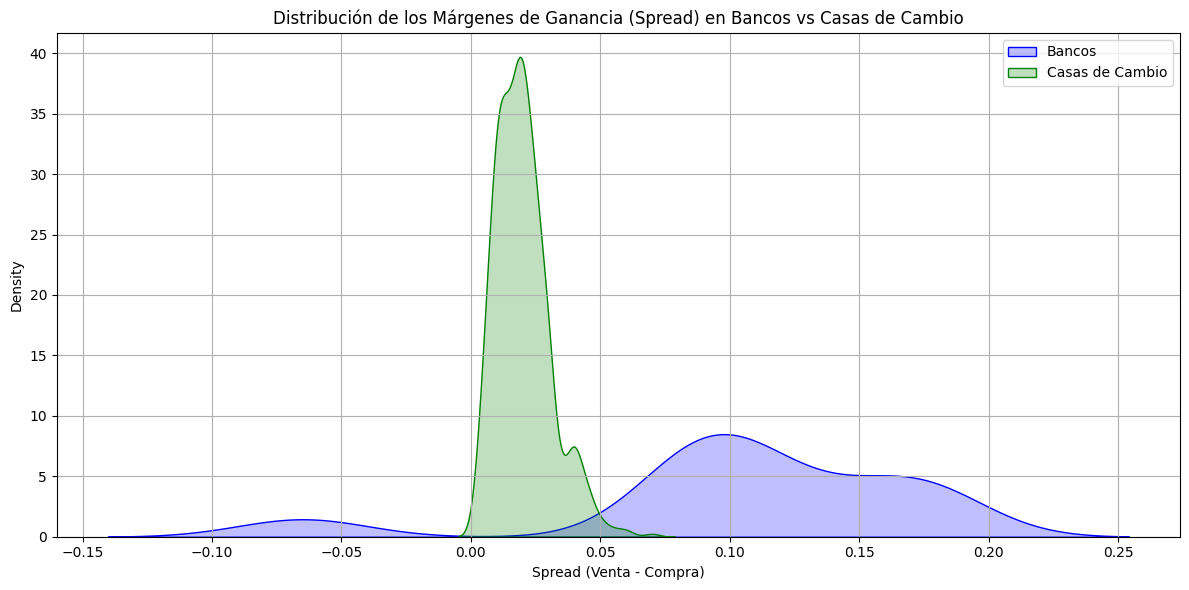

In [167]:
# Comparación de márgenes entre bancos y casas de cambio
day_banks_df['spread'] = day_banks_df['sale_cost'] - day_banks_df['buy_cost']
day_exchanges_df['spread'] = day_exchanges_df['sale_cost'] - day_exchanges_df['buy_cost']

# Gráfico comparativo de spread
plt.figure(figsize=(12, 6))
sns.kdeplot(data=day_banks_df, x='spread', label='Bancos', fill=True, color='blue')
sns.kdeplot(data=day_exchanges_df, x='spread', label='Casas de Cambio', fill=True, color='green')
plt.title('Distribución de los Márgenes de Ganancia (Spread) en Bancos vs Casas de Cambio')
plt.xlabel('Spread (Venta - Compra)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./figs/2spread_bancos_casas.png')
plt.show()


In [ ]:
# Comparación de márgenes entre bancos y casas de cambio


# Gráfico comparativo de spread
plt.figure(figsize=(12, 6))
sns.kdeplot(data=day_banks_df, x='spread', label='Bancos', fill=True, color='blue')
sns.kdeplot(data=day_exchanges_df, x='spread', label='Casas de Cambio', fill=True, color='green')
plt.title('Distribución de los Márgenes de Ganancia (Spread) en Bancos vs Casas de Cambio')
plt.xlabel('Spread (Venta - Compra)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('./figs/2spread_bancos_casas.png')
plt.show()

In [151]:
best_bank_sale_cost = day_banks_df.groupby('name').agg({'sale_cost': 'mean'}).sort_values('sale_cost', ascending = True).reset_index().head(1).name[0]
best_bank_buy_cost = day_banks_df.groupby('name').agg({'buy_cost': 'mean'}).sort_values('buy_cost', ascending = False).reset_index().head(1).name[0]

best_he_sale_cost = day_exchanges_df.groupby('companny_name').agg({'sale_cost': 'mean'}).sort_values('sale_cost', ascending = True).reset_index().head(1).companny_name[0]
best_he_buy_cost = day_exchanges_df.groupby('companny_name').agg({'buy_cost': 'mean'}).sort_values('buy_cost', ascending = False).reset_index().head(1).companny_name[0]



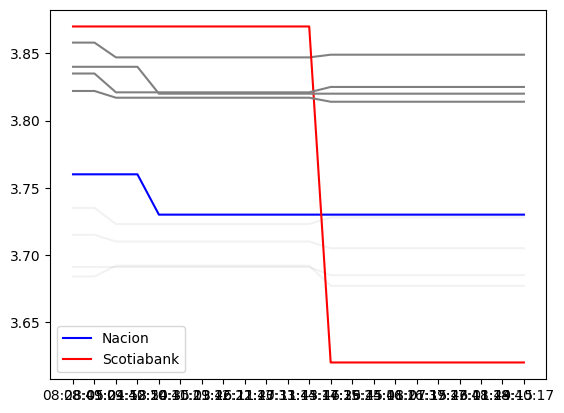

In [161]:

for name_bank in day_banks_df.name.unique():
    # buy cost
    new_name = name_bank.title()
    color = "gray"
    label = ""
    alpha = .1
    if name_bank == best_bank_buy_cost:
        color = "blue" 
        label = new_name
        alpha = 1
    plt.plot("time", "buy_cost", data = day_banks_df.query("name == @name_bank"), color = color, label = label, alpha = alpha)
for name_bank in day_banks_df.name.unique():
    # buy cost
    new_name = name_bank.title()
    color = "gray"
    label = ""
    if name_bank == best_bank_sale_cost:
        color = "red" 
        label = new_name
    plt.plot("time", "sale_cost", data = day_banks_df.query("name == @name_bank"), color = color, label = label)

plt.legend()

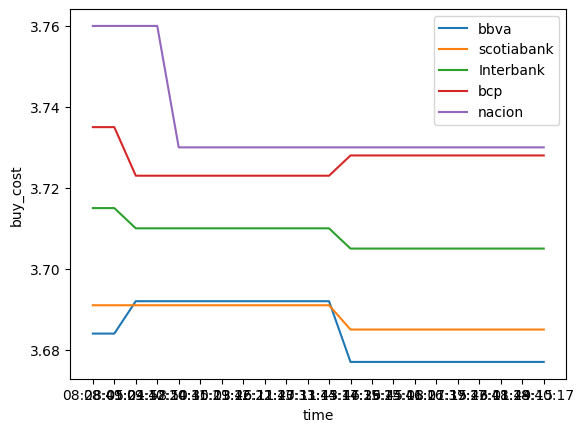

In [133]:
for bank_name in day_banks_df.name.unique():
    _ = day_banks_df.query("name == @bank_name")

    sns.lineplot(_, x="time", y="buy_cost", label = bank_name)

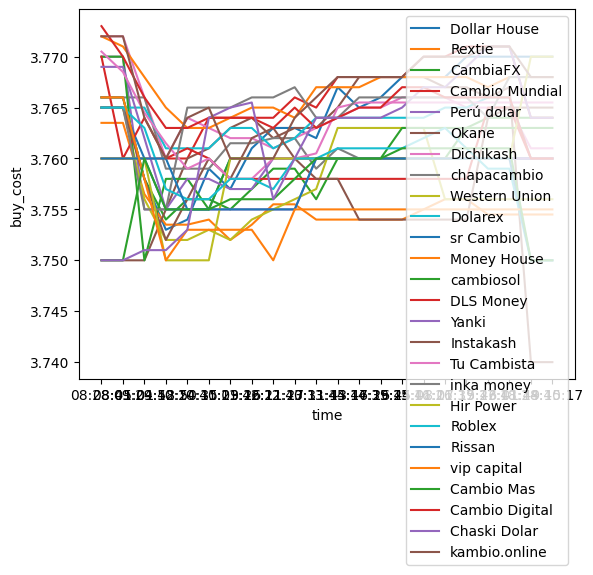

In [136]:
for he_name in day_exchanges_df.companny_name.unique():
    _ = day_exchanges_df.query("companny_name == @he_name")

    sns.lineplot(_, x="time", y="buy_cost", label = he_name)

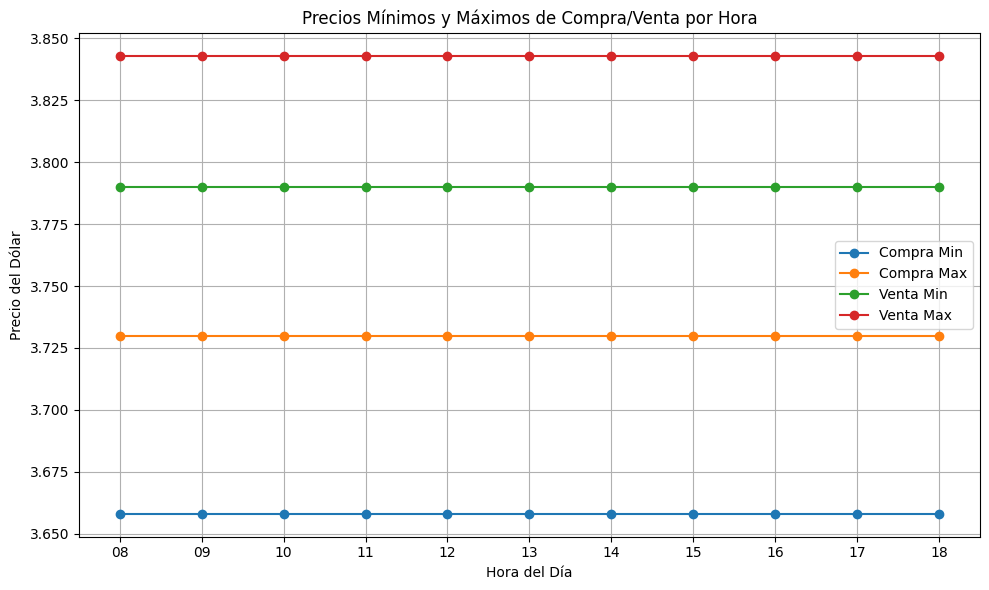

In [67]:
# Precio mínimo y máximo por hora
price_stats = banks_df.groupby(banks_df['time'].str[:2]).agg({'buy_cost': ['min', 'max'], 'sale_cost': ['min', 'max']}).reset_index()

# Gráfico de precios mínimos y máximos por hora
plt.figure(figsize=(10, 6))
plt.plot(price_stats['time'], price_stats[('buy_cost', 'min')], label='Compra Min', marker='o')
plt.plot(price_stats['time'], price_stats[('buy_cost', 'max')], label='Compra Max', marker='o')
plt.plot(price_stats['time'], price_stats[('sale_cost', 'min')], label='Venta Min', marker='o')
plt.plot(price_stats['time'], price_stats[('sale_cost', 'max')], label='Venta Max', marker='o')
plt.title('Precios Mínimos y Máximos de Compra/Venta por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Precio del Dólar')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


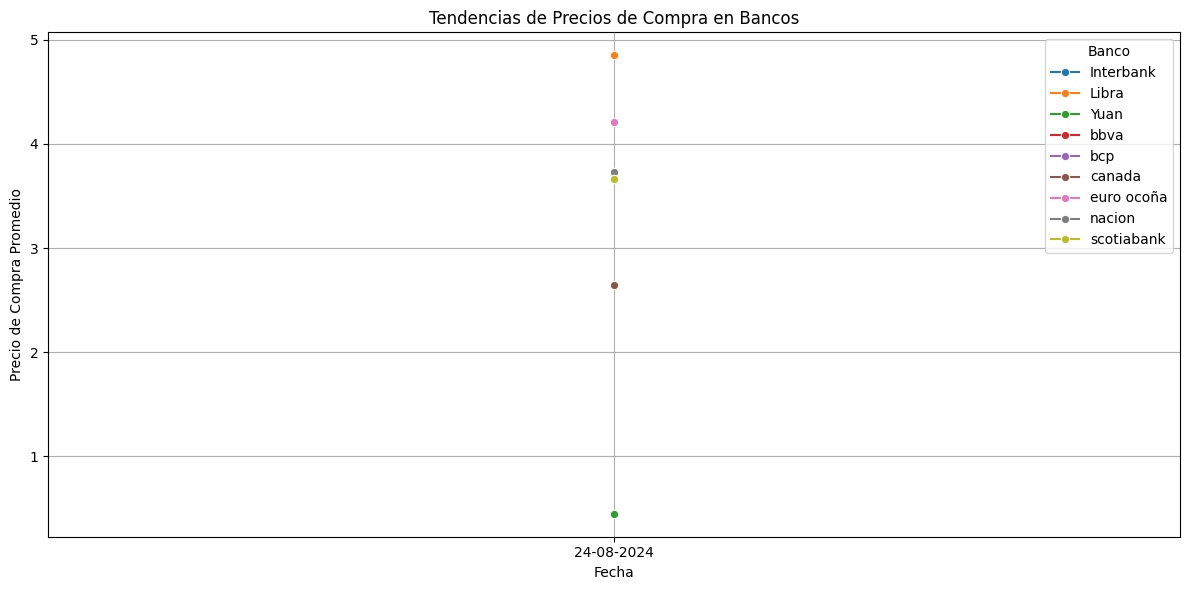

In [54]:
# Agrupar datos por día e institución para calcular el promedio diario
daily_trend_bank = banks_df.groupby(['day', 'name']).agg({'buy_cost': 'mean', 'sale_cost': 'mean'}).reset_index()
daily_trend_exchange = exchanges_df.groupby(['day', 'companny_name']).agg({'buy_cost': 'mean', 'sale_cost': 'mean'}).reset_index()

# Gráfico de tendencias de precios de compra en bancos
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trend_bank, x='day', y='buy_cost', hue='name', marker='o')
plt.title('Tendencias de Precios de Compra en Bancos')
plt.xlabel('Fecha')
plt.ylabel('Precio de Compra Promedio')
plt.legend(title='Banco')
plt.grid(True)
plt.tight_layout()
plt.show()



<!-- ui -> create a filter (banks), between_days (date input), exchange houses,  -->
<!-- ui -> (Para el dato mas actualizado) seleccionar operacion | ordenar de mejor a menor -->

<!-- ideas: crear la diferencia entre buy y cost -->
<!-- para varios dias: solo plotear la media de buy_cost, sale_cost -->
<!-- para un dia plotear  por time, -->

# Last Tracker

In [137]:
from PDolar.api import PeruDolar as PE_l
import pandas as pd
tracker = PE_l(id = None)

last_houses = tracker.houses
cols_numeric = ['buy_cost', 'buy_variation', 'sale_cost', 'sale_variation']
last_houses[cols_numeric] = last_houses[cols_numeric].apply(pd.to_numeric)

# last_houses['buy_cost']

last_houses['spread'] = last_houses['sale_cost'] - last_houses['buy_cost']
# tracker.houses
options = ["c dolares", "c soles", 'spread']
option = options[0]

if option == 'c dolares':
    col = 'buy_cost'
    best_sale = True #-> ascending sale_cost
    last_houses = last_houses[last_houses[col] > 0].sort_values(col, ascending=True)
elif option == 'c soles':
    col = 'sale_cost'
    last_houses = last_houses[last_houses[col] > 0].sort_values(col, ascending=False)
elif option == 'spread':
    col = 'spread'
    last_houses = last_houses[last_houses[col] > 0].sort_values(col, ascending=True)

last_houses.head(2)


,companny_name,img,companny_url,banks,days_open,last_updated,buy_cost,buy_variation,sale_cost,sale_variation,spread
15,Instakash,https://s3-ced-uploads-01.s3.amazonaws.com/172...,https://instakash.net/?utm_source=ced,"BCP, Interbank","{'M_F': '9 am - 7 pm', 'Saturdays': '9 am - 2 ...",2024-09-13T03:57:54.370Z,3.758,0.0,3.778,-0.001,0.02
1,Rextie,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://web.rextie.com/registrate?utm_source=c...,"BCP, Interbank, Pichincha, BANBIF","{'M_F': '8 am - 8 pm', 'Saturdays': '9 am - 3 ...",2024-09-13T03:56:28.811Z,3.760,0.0,3.790,0.000,0.03


# Exchange Houses

In [4]:
# range_data['he'].query('sale_cost > 0')

In [138]:
range_data['he']

,companny_name,img,companny_url,banks,days_open,last_updated,buy_cost,buy_variation,sale_cost,sale_variation,time,day
0,Dollar House,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://dollarhouse.pe/?utm_source=ced,"BCP, Interbak","{'M_F': '9 am - 7 pm.', 'Saturdays': '10 am - ...",2024-08-31T18:57:38.727Z,3.741,0.000,3.754,0.000,08:24:08,01-09-2024
1,Rextie,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://web.rextie.com/registrate?utm_source=c...,"BCP, Interbank, Pichincha, BANBIF","{'M_F': '8 am - 8 pm', 'Saturdays': '9 am - 3 ...",2024-06-14T18:13:16.487Z,3.724,0.000,3.759,0.000,08:24:08,01-09-2024
2,CambiaFX,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://cambiafx.pe/?utm_source=display&utm_me...,"BCP, Interbank","{'M_F': '9 am - 7pm', 'Saturdays': '10 am - 1 ...",2024-08-31T18:57:38.732Z,3.730,0.000,3.760,0.000,08:24:08,01-09-2024
3,Cambio Mundial,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://www.cambiomundial.com/?utm_source=ced,BCP - Cambio mínimo $500,"{'M_F': '9 am - 6 pm', 'Saturdays': '9 am - 1:...",2024-08-01T19:25:54.028Z,3.745,0.005,3.753,-0.002,08:24:08,01-09-2024
4,Okane,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://www.okanecambiodigital.com/?utm_source...,BCP,"{'M_F': '9 am - 6pm', 'Saturdays': '9 am - 2 p...",2024-03-12T17:40:02.715Z,3.720,-0.019,3.760,0.010,08:24:08,01-09-2024
...,...,...,...,...,...,...,...,...,...,...,...,...
6729,vip capital,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://vipcapital.com.pe/?utm_source=ced,"BCP, Scotiabank","{'M_F': '9 am - 6pm', 'Saturdays': '9 am - 1pm...",2024-03-01T14:20:50.970Z,3.755,0.000,3.780,0.000,18:40:17,12-09-2024
6730,Cambio Mas,https://s3-ced-uploads-01.s3.amazonaws.com/170...,https://cambiomas.com.pe/?utm_source=ced,"BCP, BBVA, Interbank","{'M_F': '8 am - 6 pm', 'Saturdays': '8 am - 6 ...",2024-05-13T19:06:30.179Z,3.750,-0.011,3.790,0.005,18:40:17,12-09-2024
6731,Cambio Digital,https://s3-ced-uploads-01.s3.amazonaws.com/172...,https://cambiodigitalperu.com/,BCP,"{'M_F': '9am - 7pm', 'Saturdays': '9am - 1pm',...",2024-08-31T18:14:26.018Z,3.760,0.000,3.780,-0.005,18:40:17,12-09-2024
6732,Chaski Dolar,https://s3-ced-uploads-01.s3.amazonaws.com/172...,https://chaskidolar.com/?utm_source=ced,"BCP, Interbank","{'M_F': '9 am - 6 pm', 'Saturdays': '9 am - 12...",2024-08-19T20:45:17.940Z,3.764,-0.007,3.785,0.001,18:40:17,12-09-2024


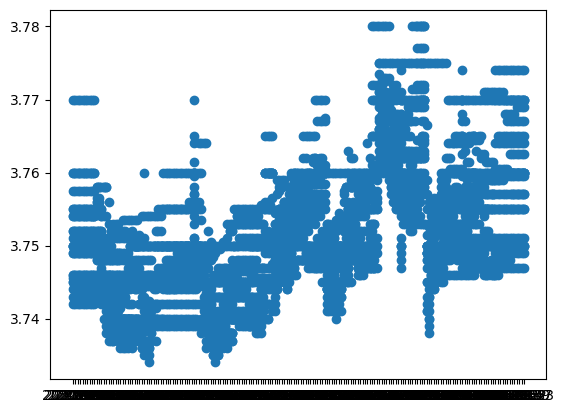

In [68]:
he_range = range_data['he']
plt.scatter("time", "sale_cost", data=range_data['he'].query('sale_cost > 0'))

In [6]:
range_data['bank']

,name,type,buy_cost,buy_variation,sale_cost,sale_variation,time,day
0,bbva,bank,3.653,-0.009,3.826,0.020,20:49:22,15-08-2024
1,scotiabank,bank,3.655,0.006,3.830,0.011,20:49:22,15-08-2024
2,Interbank,bank,3.670,-0.004,3.800,0.016,20:49:22,15-08-2024
3,bcp,bank,3.698,0.006,3.786,0.009,20:49:22,15-08-2024
4,nacion,bank,3.710,0.000,3.780,0.000,20:49:22,15-08-2024
...,...,...,...,...,...,...,...,...
1921,nacion,bank,3.730,0.000,3.790,0.000,18:40:33,24-08-2024
1922,Yuan,currency,0.450,-0.010,0.540,0.000,18:40:33,24-08-2024
1923,canada,currency,2.650,-0.040,2.795,-0.005,18:40:33,24-08-2024
1924,euro ocoña,currency,4.213,0.000,4.230,0.010,18:40:33,24-08-2024


In [72]:
day_data['bank'].query('type == "bank"')

,name,type,buy_cost,buy_variation,sale_cost,sale_variation,time,day,buy_variation_abs,sale_variation_abs,spread
datetime,,,,,,,,,,,
2024-08-24 08:22:03,bbva,bank,3.658,-0.015,3.843,0.024,08:22:03,24-08-2024,0.015,0.024,0.185
2024-08-24 08:22:03,scotiabank,bank,3.663,0.003,3.838,0.007,08:22:03,24-08-2024,0.003,0.007,0.175
2024-08-24 08:22:03,Interbank,bank,3.675,-0.005,3.800,0.008,08:22:03,24-08-2024,0.005,0.008,0.125
2024-08-24 08:22:03,bcp,bank,3.703,0.000,3.793,0.004,08:22:03,24-08-2024,0.000,0.004,0.090
2024-08-24 08:22:03,nacion,bank,3.730,0.000,3.790,0.000,08:22:03,24-08-2024,0.000,0.000,0.060
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-24 18:40:33,bbva,bank,3.658,-0.015,3.843,0.024,18:40:33,24-08-2024,0.015,0.024,0.185
2024-08-24 18:40:33,scotiabank,bank,3.663,0.003,3.838,0.007,18:40:33,24-08-2024,0.003,0.007,0.175
2024-08-24 18:40:33,Interbank,bank,3.675,-0.005,3.800,0.008,18:40:33,24-08-2024,0.005,0.008,0.125


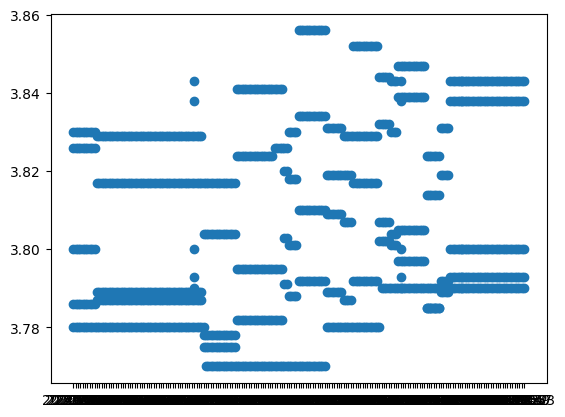

In [7]:
plt.scatter("time", "sale_cost", data=range_data['bank'].query('type == "bank"'))

In [8]:
range_data['bank'].query('type != "bank"')

,name,type,buy_cost,buy_variation,sale_cost,sale_variation,time,day
5,Yuan,currency,0.450,-0.010,0.540,0.000,20:49:22,15-08-2024
6,canada,currency,2.690,0.050,2.800,0.000,20:49:22,15-08-2024
7,euro ocoña,currency,4.170,0.005,4.190,0.005,20:49:22,15-08-2024
8,Libra,currency,4.880,-0.040,5.010,0.020,20:49:22,15-08-2024
14,Yuan,currency,0.450,-0.010,0.540,0.000,22:08:47,15-08-2024
...,...,...,...,...,...,...,...,...
1916,Libra,currency,4.850,-0.010,4.990,0.000,18:20:47,24-08-2024
1922,Yuan,currency,0.450,-0.010,0.540,0.000,18:40:33,24-08-2024
1923,canada,currency,2.650,-0.040,2.795,-0.005,18:40:33,24-08-2024
1924,euro ocoña,currency,4.213,0.000,4.230,0.010,18:40:33,24-08-2024


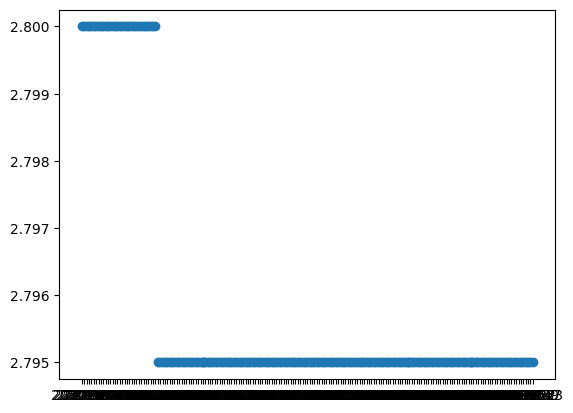

In [9]:
plt.scatter("time", "sale_cost", data=range_data['bank'].query('type != "bank" and name == "canada"'))

In [18]:
range_data

{'bank':             name      type  buy_cost  buy_variation  sale_cost  \
 0           bbva      bank     3.653         -0.009      3.826   
 1     scotiabank      bank     3.655          0.006      3.830   
 2      Interbank      bank     3.670         -0.004      3.800   
 3            bcp      bank     3.698          0.006      3.786   
 4         nacion      bank     3.710          0.000      3.780   
 ...          ...       ...       ...            ...        ...   
 1921      nacion      bank     3.730          0.000      3.790   
 1922        Yuan  currency     0.450         -0.010      0.540   
 1923      canada  currency     2.650         -0.040      2.795   
 1924  euro ocoña  currency     4.213          0.000      4.230   
 1925       Libra  currency     4.850         -0.010      4.990   
 
       sale_variation      time         day companny_name  
 0              0.020  20:49:22  15-08-2024           NaN  
 1              0.011  20:49:22  15-08-2024           NaN  
 2    

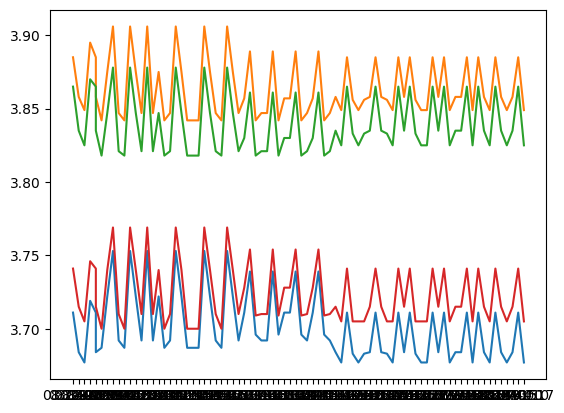

In [140]:
a = last_data['bank'].query('type == "bank" & name == "bbva"').sort_values('time')
b = last_data['bank'].query('type == "bank" & name == "Interbank"').sort_values('time')
plt.plot('time', 'buy_cost', data = a)
plt.plot('time', 'sale_cost', data = a)
plt.plot('time', 'sale_cost', data = b)
plt.plot('time', 'buy_cost', data = b)